In [5]:
import numpy as np
import pandas as pd
import re,math
from sklearn import preprocessing
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier#随机森林分类树
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


high_similar_regiments = pd.read_csv(r'tptp.csv')
low_similar_regiments = pd.read_csv(r'dpdp.csv')
#读取药物对数据  高相似 低相似团
drugs_data = pd.read_excel(r'Label_synergy4000.xlsx')

In [6]:
#原始数据
origin = pd.read_csv(r'CCLE_EXP(name).csv')
#已有的35细胞系
data = pd.read_csv(r'35_CCLE4000.csv')
c_list = []
for i in origin.columns:
    c_list.append(str(i))
real_names = []
name_index = [] 
for i in data['Name']:
    name_index.append(str(i).strip())
for i in name_index:
    text = i + '.*? '
    cout = 0
    for j in c_list:
        temp_list = re.findall(text, j, re.S)
        if len(temp_list) != 0:
            if (c_list[cout] != 'NCIH2342_LUNG ') & (c_list[cout] != 'NCIH2347_LUNG '):
                real_names.append(c_list[cout])
                break
        cout +=1

In [7]:
high_cells = high_similar_regiments.columns[1:]
#data = np.array(high_similar_regiments.iloc[:,1:].values)
drugs_temp = []
j = 0
for i in drugs_data.columns[2:]:
    drugs_temp.append(drugs_data[i].rename(real_names[j]))
    j += 1
t = drugs_temp[0].rename(real_names[0])
for i in drugs_temp[1:]:
    t = pd.concat([t,i],axis=1)
#t = pd.concat([drugs_data['DrugA'],drugs_data['DrugB'],t],axis=1)
drugs = t.copy()
#zscore标准化
values = drugs.values            #Dataframe转换为Array
values = values.astype('float32')       #定义数据类型
scaler = preprocessing.StandardScaler() #创建Scaler对象
temp = scaler.fit_transform(values)     #稀疏矩阵  
drugs=pd.DataFrame(temp,columns=drugs.columns) #将Array还原为Dataframe，保持行列名
#提取药物对对应高相似团
high_list = []
for i in high_cells:
    high_list.append(drugs[i])
r = high_list[0]
for i in high_list[1:]:
    r = pd.concat([r,i],axis=1)
#r = pd.concat([drugs_data['DrugA'],drugs_data['DrugB'],r],axis=1)
high_result = r
high_result

,A2058_SKIN,A2780_OVARY,CAOV3_OVARY,COLO320_LARGE_INTESTINE,HT29_LARGE_INTESTINE,KPL1_BREAST,MDAMB436_BREAST,NCIH1650_LUNG,NCIH460_LUNG,OVCAR4_OVARY,SKMEL30_SKIN,SW620_LARGE_INTESTINE,SW837_LARGE_INTESTINE
0,-0.818766,-0.289857,-0.793601,-0.021771,-0.088436,-0.282331,-0.165327,0.346556,-0.217774,-0.844471,0.135685,-0.051580,0.061116
1,-0.988418,-0.622916,-0.766872,0.721469,-1.494839,0.134112,-0.829243,-0.220816,0.132677,-0.594948,-0.090577,0.537630,-0.337035
2,0.832241,0.307940,0.345741,0.313842,0.462874,0.213651,0.015957,-0.175414,0.166507,-0.040916,0.163390,0.314137,-0.307867
3,-0.182455,-0.830387,-0.723437,-0.059137,-0.495730,-0.507462,-0.127162,-0.371152,-0.591599,-0.127377,-4.768183,-0.706485,-0.841287
4,1.710387,0.709821,0.425930,1.156272,1.745513,1.349922,0.600362,1.009803,1.275218,0.262834,0.906820,0.849167,0.343686
...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,-0.319464,0.167282,1.311342,-0.346107,0.575386,-0.099959,0.870699,0.395087,0.460216,-0.844471,0.699029,1.092979,-0.215256
579,0.040990,-0.018085,-0.472180,-0.167838,-0.098000,-1.049881,-0.263126,-0.208522,-0.315831,0.452441,0.130143,-0.560875,0.127109
580,0.326502,0.202447,1.003954,0.197668,0.513504,0.884051,1.005867,1.629912,-0.059541,2.170280,0.611295,-0.503986,0.551512
581,-0.671182,-0.179842,-0.242788,-1.561244,-1.303568,1.446505,-0.492435,-0.909838,0.112686,-0.152784,0.120908,-0.573743,0.569742


In [35]:
target = np.array(np.zeros(len(high_result.index)))#.reshape(1,-1)

In [36]:
target

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [37]:
def WC(C,a):
    return math.exp(abs((1-C)*(1-C))/a)

In [38]:
high_result.values.shape

(583, 13)

In [39]:
for i in range(1,13):
    clf = DecisionTreeClassifier(random_state=25)
    xtrain,xtest,ytrain,ytest = train_test_split(high_result.values,target,test_size=i/13)#数据和特征分开导入

    clf = DecisionTreeClassifier(random_state=1)
    rfc = RandomForestClassifier(random_state=1)

    #导入训练
    clf = clf.fit(xtrain,ytrain)
    rfc = rfc.fit(xtrain,ytrain)

    #打分
    score_c = clf.score(xtest,ytest)
    score_r = rfc.score(xtest,ytest)

    print("Single Tree:{}".format(score_c)
      ,"Random Forest:{}".format(score_r))


Single Tree:1.0 Random Forest:1.0
Single Tree:1.0 Random Forest:1.0
Single Tree:1.0 Random Forest:1.0
Single Tree:1.0 Random Forest:1.0
Single Tree:1.0 Random Forest:1.0
Single Tree:1.0 Random Forest:1.0
Single Tree:1.0 Random Forest:1.0
Single Tree:1.0 Random Forest:1.0
Single Tree:1.0 Random Forest:1.0
Single Tree:1.0 Random Forest:1.0
Single Tree:1.0 Random Forest:1.0
Single Tree:1.0 Random Forest:1.0


ValueError: x and y must have same first dimension, but have shapes (13,) and (10,)

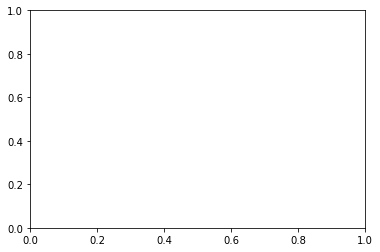

In [40]:
rfc = RandomForestClassifier(random_state=25)
rfc_s = cross_val_score(rfc,high_result.values,target,cv=10)

clf = DecisionTreeClassifier(random_state=25)
clf_s = cross_val_score(clf,high_result.values,target,cv=10)

plt.plot(range(1,14),rfc_s,label="RandomForest")
plt.plot(range(1,14),clf_s,label="DecisionTree")
plt.legend()
plt.show()